# A Walkthrough of Labeled LDA
Using the code of JoeZJH, ported to python3 https://github.com/JoeZJH/Labeled-LDA-Python

In [12]:
import os
from scipy.stats import gaussian_kde
import importlib.util
spec = importlib.util.spec_from_file_location("labeled_lda", os.path.expanduser("/home/mt/code/utils/Labeled-LDA-Python/model/labeled_lda.py"))
labeledLDA = importlib.util.module_from_spec(spec)
spec.loader.exec_module(labeledLDA)

Plate model of dependencies

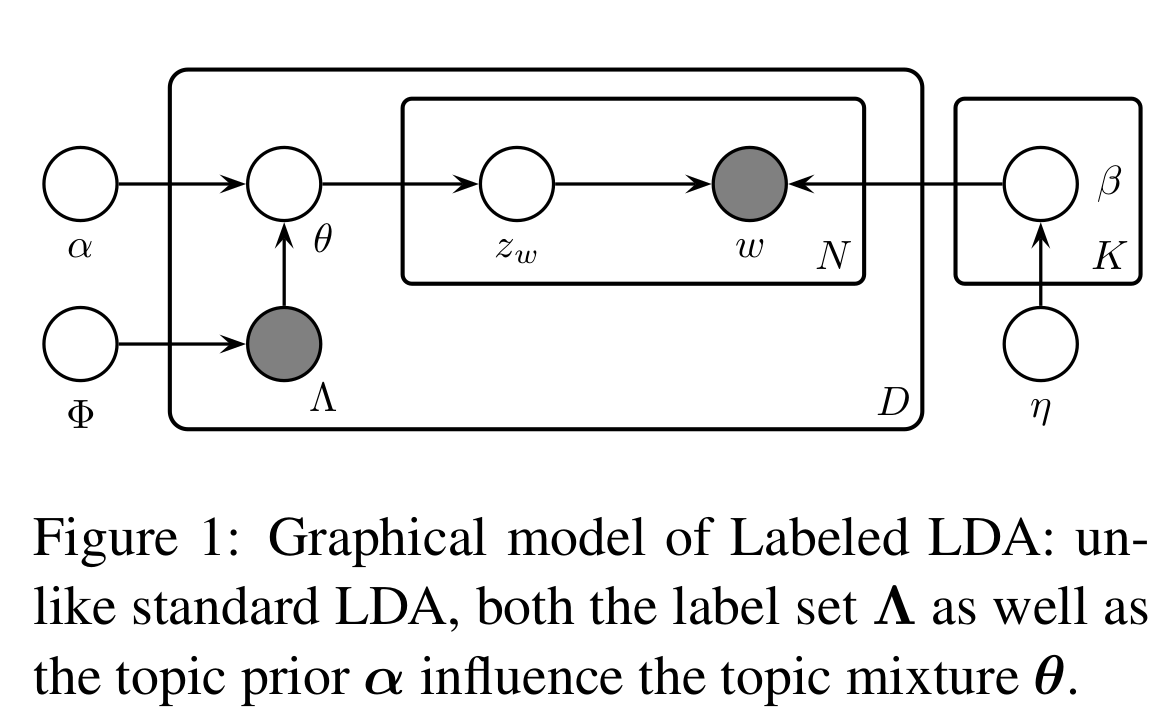

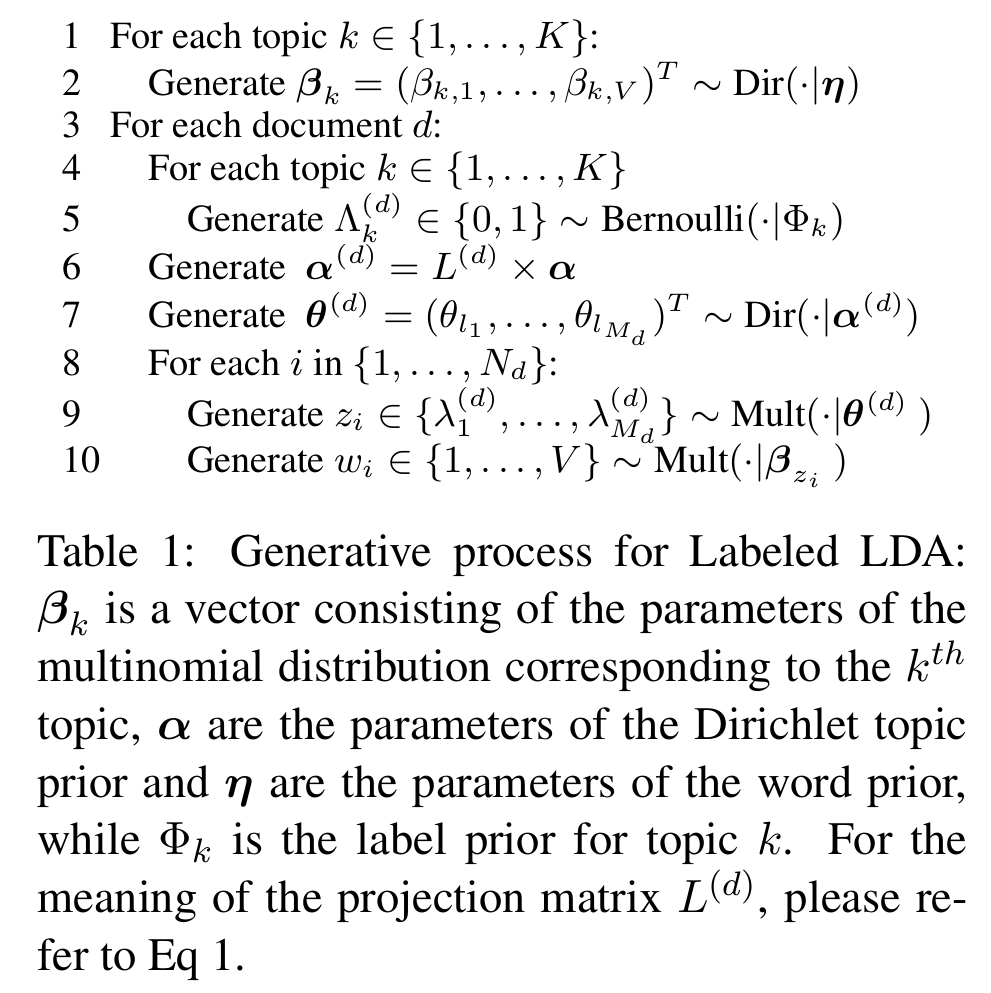

The Gibbs sample likelihood ratio is shown below. It can be interpreted as:
The probability that topic label for word i equals j given 


## Load An Example Dataset and generate model

In [74]:
labeled_documents = [("example example example example example", ["example"]),
                     ("test llda model test llda model test llda model", ["test", "llda_model"]),
                     ("test example test", ["example", "test"]),
                     ("good perfect good good perfect good good perfect good ", ["positive"]),
                     ("bad bad down down bad bad down", ["negative"]),
                    ("bad bad llda example good down bad bad down", [])]

In [76]:
self=labeledLDA.LldaModel(labeled_documents=labeled_documents, alpha_vector=0.02, eta_vector=0.002)
self


Labeled-LDA Model:
	K = 6
	M = 6
	T = 8
	WN = 42
	LN = 13
	alpha = 0.02
	eta = 0.002
	perplexity = 3.302268645764832
	

**K** number labels, **M** Number Documents, **T** number of unique words, **WN** total number words, **LN** Total number of labels, **alpha** doc_topic prior, **eta** word_topic prior



In [77]:
labeled_documents = [("example example example example example", ["example"]),
                     ("test llda model test llda model test llda model", ["test", "llda_model"]),
                     ("example test example test example test example test", ["example", "test"]),
                     ("good perfect good good perfect good good perfect good ", ["positive"]),
                     ("bad bad down down bad bad down", ["negative"])]

In [78]:
self=labeledLDA.LldaModel(labeled_documents=labeled_documents, alpha_vector=0.02, eta_vector=0.002)
self


Labeled-LDA Model:
	K = 6
	M = 5
	T = 8
	WN = 38
	LN = 7
	alpha = 0.02
	eta = 0.002
	perplexity = 3.831652091792764
	

In [79]:
model.training(iteration=10)

gibbs sample count:  38
gibbs sample count:  38
gibbs sample count:  38
gibbs sample count:  38
gibbs sample count:  38
gibbs sample count:  38
gibbs sample count:  38
gibbs sample count:  38
gibbs sample count:  38
gibbs sample count:  38


In [80]:
dir(self)


['Doc2TopicCount',
 'K',
 'LN',
 'Lambda',
 'M',
 'SaveModel',
 'T',
 'Topic2TermCount',
 'Topic2TermCountSum',
 'W',
 'WN',
 'Z',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_extend_matrix',
 '_find_and_create_dirs',
 '_gibbs_sample_inference',
 '_gibbs_sample_inference_multi_processors',
 '_gibbs_sample_training',
 '_initialize_derivative_fields',
 '_load_labeled_documents',
 '_multinomial_sample',
 '_read_object_from_file',
 '_write_object_to_file',
 'all_perplexities',
 'alpha_vector',
 'alpha_vector_Lambda',
 'beta',
 'beta_k',
 'eta_vector',
 'eta_vector_sum',
 'inference',
 'inference_multi_processors',
 'is_convergent',
 'iteration',
 'load_model_from_dir'

In [81]:
print(self)
print(self.alpha_vector)
print(self.alpha_vector_Lambda)


Labeled-LDA Model:
	K = 6
	M = 5
	T = 8
	WN = 38
	LN = 7
	alpha = 0.02
	eta = 0.002
	perplexity = 3.831652091792764
	
[0.02, 0.02, 0.02, 0.02, 0.02, 0.02]
[[0.02 0.   0.   0.   0.02 0.  ]
 [0.   0.   0.   0.02 0.02 0.02]
 [0.02 0.   0.   0.02 0.02 0.  ]
 [0.   0.   0.02 0.   0.02 0.  ]
 [0.   0.02 0.   0.   0.02 0.  ]]


In [82]:
print(self.beta)
print(self.beta.shape)
print(self.eta_vector)

[[9.95358090e-01 6.63129973e-04 6.63129973e-04 6.63129973e-04
  6.63129973e-04 6.63129973e-04 6.63129973e-04 6.63129973e-04]
 [1.96850394e-03 1.96850394e-03 1.96850394e-03 1.96850394e-03
  9.86220472e-01 1.96850394e-03 1.96850394e-03 1.96850394e-03]
 [6.63129973e-04 6.63793103e-01 3.32228117e-01 6.63129973e-04
  6.63129973e-04 6.63129973e-04 6.63129973e-04 6.63129973e-04]
 [3.99122807e-01 3.98724083e-04 3.98724083e-04 1.99760766e-01
  3.98724083e-04 3.98724083e-04 3.99122807e-01 3.98724083e-04]
 [1.81776890e-01 1.81776890e-01 9.09338663e-02 9.08430233e-05
  1.36355378e-01 1.36355378e-01 1.81776890e-01 9.09338663e-02]
 [4.98007968e-04 4.98007968e-04 4.98007968e-04 4.98505976e-01
  4.98007968e-04 4.98007968e-04 2.49501992e-01 2.49501992e-01]]
(6, 8)
[0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002]


In [83]:
print(self.theta)
print(self.theta.shape)
print(self.W)


[[0.40079365 0.         0.         0.         0.59920635 0.        ]
 [0.         0.         0.         0.33333333 0.22295806 0.44370861]
 [0.12655087 0.         0.         0.25062035 0.62282878 0.        ]
 [0.         0.         0.3340708  0.         0.6659292  0.        ]
 [0.         0.14488636 0.         0.         0.85511364 0.        ]]
(5, 6)
[[0, 0, 0, 0, 0], [6, 7, 3, 6, 7, 3, 6, 7, 3], [0, 6, 0, 6, 0, 6, 0, 6], [1, 2, 1, 1, 2, 1, 1, 2, 1], [4, 4, 5, 5, 4, 4, 5]]


In [89]:
print(self.topic_vocabulary)
print(self.terms)
print(self.Z)
print(self.Lambda)

{'example': 0, 'negative': 1, 'positive': 2, 'test': 3, 'common_topic': 4, 'llda_model': 5}
['example', 'good', 'perfect', 'model', 'bad', 'down', 'test', 'llda']
[[4, 0, 4, 0, 4], [3, 4, 3, 3, 4, 5, 5, 5, 5], [3, 4, 3, 4, 0, 4, 4, 4], [4, 4, 4, 4, 2, 2, 4, 4, 2], [4, 4, 4, 4, 1, 4, 4]]
[[1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 1. 1.]
 [1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0.]]


## Stepping through the \_gibbs\_sample\_training function

In [92]:
count = 0
#Would normally loop through M documents for m in range(self.M):
m = 1
doc_m_alpha_vector = self.alpha_vector_Lambda[m]
doc_m_alpha_vector

array([0.  , 0.  , 0.  , 0.02, 0.02, 0.02])

In [95]:
#Now it will loop through the zip of words, the current labels, and the index 
#for t, z, n in zip(self.W[m], self.Z[m], range(len(self.W[m]))):
print(self.W[m], self.Z[m], range(len(self.W[m])))
i=1
t, z, n =self.W[m][i], self.Z[m][i], range(len(self.W[m]))[i]

[6, 7, 3, 6, 7, 3, 6, 7, 3] [3, 4, 3, 3, 4, 5, 5, 5, 5] range(0, 9)


In [106]:
print(self.Doc2TopicCount)
print(self.Doc2TopicCount.shape)
print(self.Topic2TermCount)
print(self.Topic2TermCount.shape)
print(self.Topic2TermCountSum)

[[2 0 0 0 3 0]
 [0 0 0 3 1 4]
 [1 0 0 2 5 0]
 [0 0 3 0 6 0]
 [0 1 0 0 6 0]]
(5, 6)
[[3 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 2 1 0 0 0 0 0]
 [2 0 0 1 0 0 2 0]
 [4 4 2 0 3 3 4 1]
 [0 0 0 2 0 0 1 1]]
(6, 8)
[ 3  1  3  5 21  4]


In [2]:
import pandas
pandas.read_csv('/home/mt/Documents/')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [102]:
#Now going to reassign z for this word
k = z
self.Doc2TopicCount[m, k] -= 1
self.Topic2TermCount[k, t] -= 1
self.Topic2TermCountSum[k] -= 1


In [107]:
doc_m_alpha_vector

array([0.  , 0.  , 0.  , 0.02, 0.02, 0.02])

In order to move towards a more likely parameter set, need to use the following proportionality between the likelihood without the current terms label and 

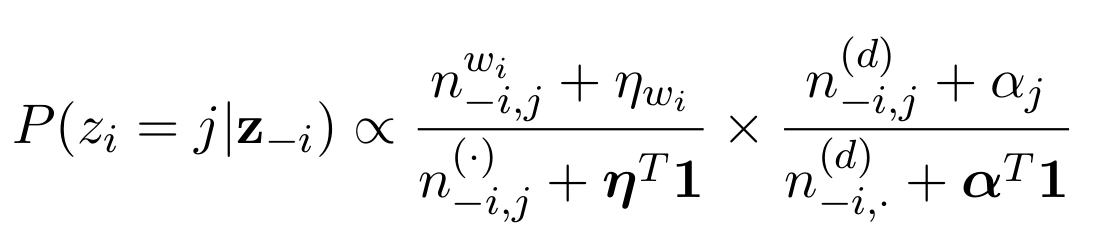

In [109]:
numerator_theta_vector = self.Doc2TopicCount[m] + doc_m_alpha_vector
print(self.Doc2TopicCount[m])
print(doc_m_alpha_vector)

[0 0 0 3 1 4]
[0.   0.   0.   0.02 0.02 0.02]


Is this, the number words in each topic for the document, plus the label including alpha prior:
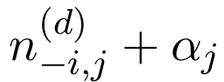

In [110]:
numerator_beta_vector = self.Topic2TermCount[:, t] + self.eta_vector[t]
print( self.Topic2TermCount[:, t])
print(self.eta_vector[t])

[0 0 0 0 1 1]
0.002


Is this, the number of times the term appears in each topic plus the prior eta:
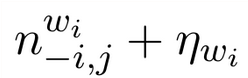

In [114]:
denominator_beta = self.Topic2TermCountSum + self.eta_vector_sum
print(self.Topic2TermCountSum)
print(self.eta_vector_sum)
beta_vector = 1.0 * numerator_beta_vector / denominator_beta


[ 3  1  3  5 21  4]
0.016


Is this, the total number of terms in each topic plus the total beta (eta) prior
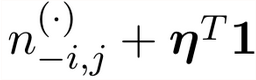

In [115]:
theta_vector = numerator_theta_vector/1

theta_vector = 1.0 * numerator_theta_vector / denominator_theta, but the denominator_theta is independent with t and k, so denominator could be any value except 0, so he sets denominator_theta as 1.0.
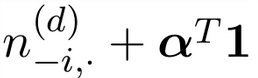

In [117]:
p_vector = beta_vector * theta_vector
print( p_vector)
p_vector = 1.0 * p_vector / sum(p_vector)
print('Renormalized p_vector')
print( p_vector)

[0.         0.         0.         0.00120415 0.04863152 1.00299801]
Renormalized p_vector
[0.         0.         0.         0.00114372 0.04619107 0.95266521]


Now we use the Gibbs likelihood ratio to resample z. 

In [126]:
sample_z = self._multinomial_sample(p_vector)
print(sample_z)
self.Z[m][n] = sample_z
k = sample_z
self.Doc2TopicCount[m, k] += 1
self.Topic2TermCount[k, t] += 1
self.Topic2TermCountSum[k] += 1
count += 1
print(self.Doc2TopicCount)
print(self.Topic2TermCount)
print(self.Topic2TermCountSum[k])

5
[[2 0 0 0 3 0]
 [0 0 0 3 1 5]
 [1 0 0 2 5 0]
 [0 0 3 0 6 0]
 [0 1 0 0 6 0]]
[[3 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 2 1 0 0 0 0 0]
 [2 0 0 1 0 0 2 0]
 [4 4 2 0 3 3 4 1]
 [0 0 0 2 0 0 1 2]]
5


Simply doing multiple passes through the data allows convergence on a MAP configuration of the model parameters. Doing inference on a new, unlabeled document 

In [156]:
import numpy as np
term_vector=[2,1,0,3,2,2,2,2,2,2,2,2,2,2,2]
iteration=30

doc_topic_count = np.zeros(self.K, dtype=int)
p_vector = np.ones(self.K, dtype=int)
p_vector = p_vector * 1.0 / sum(p_vector)
z_vector = [self._multinomial_sample(p_vector) for _ in term_vector]
for n, t in enumerate(term_vector):
    k = z_vector[n]
    doc_topic_count[k] += 1
    self.Topic2TermCount[k, t] += 1
    self.Topic2TermCountSum[k] += 1

# sum_doc_topic_count = sum(doc_topic_count)
doc_m_alpha_vector = self.alpha_vector
# sum_doc_m_alpha_vector = sum(doc_m_alpha_vector)
for i in range(iteration):
    for n, t in enumerate(term_vector):
        k = z_vector[n]
        doc_topic_count[k] -= 1
        self.Topic2TermCount[k, t] -= 1
        self.Topic2TermCountSum[k] -= 1

        numerator_theta_vector = doc_topic_count + doc_m_alpha_vector
        # denominator_theta = sum_doc_topic_count - 1 + sum_doc_m_alpha_vector

        numerator_beta_vector = self.Topic2TermCount[:, t] + self.eta_vector[t]
        # denominator_beta = self.Topic2TermCount.sum(axis=1) + sum(self.eta_vector)
        denominator_beta = self.Topic2TermCountSum + self.eta_vector_sum

        beta_vector = 1.0 * numerator_beta_vector / denominator_beta
        # theta_vector = 1.0 numerator_theta_vector / denominator_theta
        # denominator_theta is independent with t and k, so denominator could be any value except 0
        # will set denominator_theta as 1.0
        theta_vector = numerator_theta_vector

        p_vector = beta_vector * theta_vector
        # print( p_vector)
        p_vector = 1.0 * p_vector / sum(p_vector)
        # print( p_vector)
        sample_z = self._multinomial_sample(p_vector)
        z_vector[n] = sample_z

        k = sample_z
        doc_topic_count[k] += 1
        self.Topic2TermCount[k, t] += 1
        self.Topic2TermCountSum[k] += 1
# reset self.Topic2TermCount
for n, t in enumerate(term_vector):
    k = z_vector[n]
    self.Topic2TermCount[k, t] -= 1
    self.Topic2TermCountSum[k] -= 1

numerator_theta_vector = doc_topic_count + doc_m_alpha_vector
# denominator_theta = sum(doc_topic_count) + sum(doc_m_alpha_vector)
denominator_theta = sum(numerator_theta_vector)
theta_new = 1.0 * numerator_theta_vector / denominator_theta


In [159]:
z_vector

[2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2]

In [158]:
#the mixture of the new document
theta_new

array([0.19973545, 0.00132275, 0.79497354, 0.00132275, 0.00132275,
       0.00132275])